<a href="https://colab.research.google.com/github/EnricoMiche1210760/toxic_comments_filter/blob/main/src/progetto_toxic_comments_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: Toxic Comment Filter

Costruire un modello in grado di filtrare i commenti degli utenti in base al grado di dannosità del linguaggio:
1. Preprocessare il testo eliminando l'insieme di token che non danno contributo significativo a livello semantico
2. Trasformare il corpus testuale in sequenze
3. Costruire un modello di Deep Learning comprendente dei layer ricorrenti per un task di classificazione multilabel
4. In prediction time, il modello deve ritornare un vettore contenente un 1 o uno 0 in corrispondenza di ogni label presente nel dataset (toxic,	severe_toxic,	obscene,	threat,	insult,	identity_hate). In questo modo, un commento non dannoso sarà classificato da un vettore di soli 0 [0,0,0,0,0,0]. Al contrario, un commento pericoloso presenterà almeno un 1 tra le 6 labels.

In [47]:
import pandas as pd
import nltk
import spacy
import numpy as np
import os
import warnings
import tensorflow as tf

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config Completer.use_jedi = False
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings("ignore")
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


COLAB = False
if "google.colab" in str(get_ipython()):
    COLAB = True
    print('Running on CoLab')

In [48]:
if COLAB == True:
    BASE_URL = "https://s3.eu-west-3.amazonaws.com/profession.ai/datasets/"
    storage_folder = "./"
else:
    BASE_URL = "../data/"
    storage_folder = BASE_URL
df = pd.read_csv(BASE_URL+"Filter_Toxic_Comments_dataset.csv")

In [49]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum_injurious
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


In [50]:
df[df['sum_injurious']==2]

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum_injurious
51,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0,2
58,My Band Page's deletion. You thought I was gon...,1,0,1,0,0,0,2
79,Hi! I am back again!\nLast warning!\nStop undo...,1,0,0,1,0,0,2
86,"Would you both shut up, you don't run wikipedi...",1,0,0,0,1,0,2
168,"You should be fired, you're a moronic wimp who...",1,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...
159253,what do you mean \n\nwhy don't you keep your n...,1,0,1,0,0,0,2
159334,"Horse's ass \n\nSeriously, dude, what's that h...",1,0,1,0,0,0,2
159449,I think he is a gay fag!!!,1,0,0,0,0,1,2
159514,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0,2


In [51]:
len(df)

159571

In [52]:
df_text = np.array(df['comment_text'])
type(df_text)


try:
    nlp = spacy.load('en_core_web_sm')
except:
    os.system('python -m spacy download en_core_web_sm')
    nlp = spacy.load('en_core_web_sm')
try:
    eng_stopwords = nltk.corpus.stopwords.words('english')
except:
    nltk.download('stopwords')
    eng_stopwords = nltk.corpus.stopwords.words('english')
try:
    _ = nltk.tokenize.word_tokenize('test')
except:
    nltk.download('punkt')

def preprocess_text_and_store(text, doc_store=None, store=False):
    preprocessed_text = np.empty(len(text), dtype=object)
    if doc_store is None or doc_store not in os.listdir(storage_folder):
        counter = 0
        for i in range(len(text)):
            process_words = []
            text[i] = text[i].replace('\d', ' ')
            for word in nltk.word_tokenize(nlp(text[i].lower()).text):
                if word.isalpha() and word not in eng_stopwords and len(str(word)) >= 3:
                    process_words.append(word)
            preprocessed_text[counter] = ' '.join(process_words)
            counter += 1
    else:
        preprocessed_text = np.array(pd.read_csv(storage_folder+doc_store)['comment_text'])
    if store and not COLAB:
        pd.DataFrame(data = {"comment_text":preprocessed_text}).to_csv(BASE_URL+doc_store)

    return preprocessed_text

preprocessed_text= preprocess_text_and_store(df_text, doc_store="preprocessed_text.csv", store=True)


numpy.ndarray

In [53]:
df_text[0]
preprocessed_text[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

'explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac please remove template talk page since retired'

In [54]:
df = df.drop(columns=['comment_text'])

In [55]:
df.head(5)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum_injurious
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [56]:
df['sum_injurious'].unique()

array([0, 4, 1, 3, 2, 5, 6])

In [57]:
import matplotlib.pyplot as plt

def show_number(plot, barplot):
    for i in range(len(barplot)):
        height = barplot[i].get_height()
        plot.text(barplot[i].get_x() + barplot[i].get_width()/2, height, height, ha='center', va='bottom')

def plot_bar(columns, rows, figsize=(8,5), title:str=None, xlabel:str=None, ylabel:str=None, color='blue', xticks_settings=None, yticks_settings=None):
    plt.figure(figsize=figsize)
    barplot = plt.bar(columns, rows, color=color)
    plt.yticks(**yticks_settings)
    plt.xticks(**xticks_settings)
    if title is not None:
        plt.title(title, fontsize=15)
    if xlabel is not None:
        plt.xlabel(xlabel, fontsize=10)
    if ylabel is not None:
        plt.ylabel(ylabel, fontsize=10)
    show_number(plt, barplot)
    plt.show();


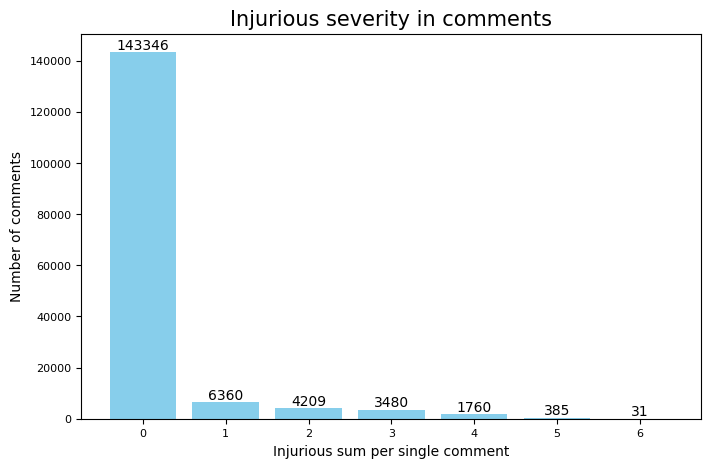

In [58]:
col_names = np.sort(df['sum_injurious'].unique())
comments_per_injurious = df['sum_injurious'].value_counts()

plot_bar(col_names, comments_per_injurious, title='Injurious severity in comments', \
         xlabel='Injurious sum per single comment', ylabel='Number of comments', color='skyblue', \
            xticks_settings={'fontsize':8}, yticks_settings={'fontsize':8})



In [59]:
injurious = df.drop(columns=['sum_injurious'])
non_injurious = pd.Series(data=comments_per_injurious[0], index=["none"])
injurious_type_sum = pd.concat([injurious.sum(axis=0), non_injurious]).sort_values(ascending=False)
injurious_type_sum

none             143346
toxic             15294
obscene            8449
insult             7877
severe_toxic       1595
identity_hate      1405
threat              478
dtype: int64

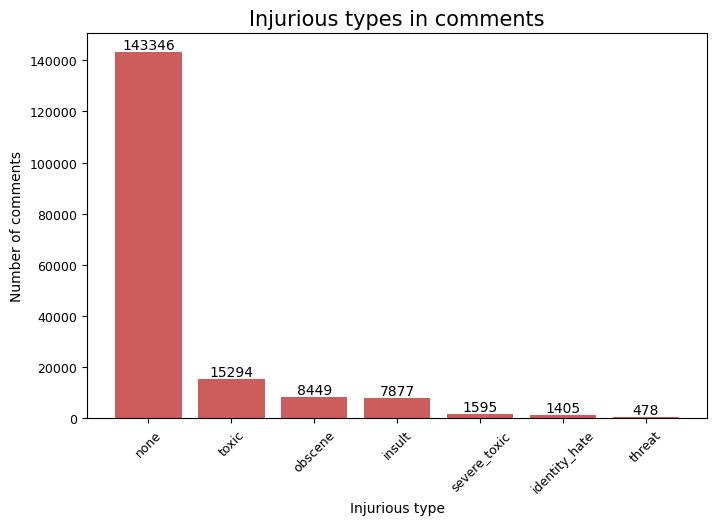

In [60]:
plot_bar(injurious_type_sum.index, injurious_type_sum, title='Injurious types in comments', \
         xlabel='Injurious type', ylabel='Number of comments', color='indianred', \
            xticks_settings={'rotation':45, 'fontsize':9}, yticks_settings={'fontsize':9})

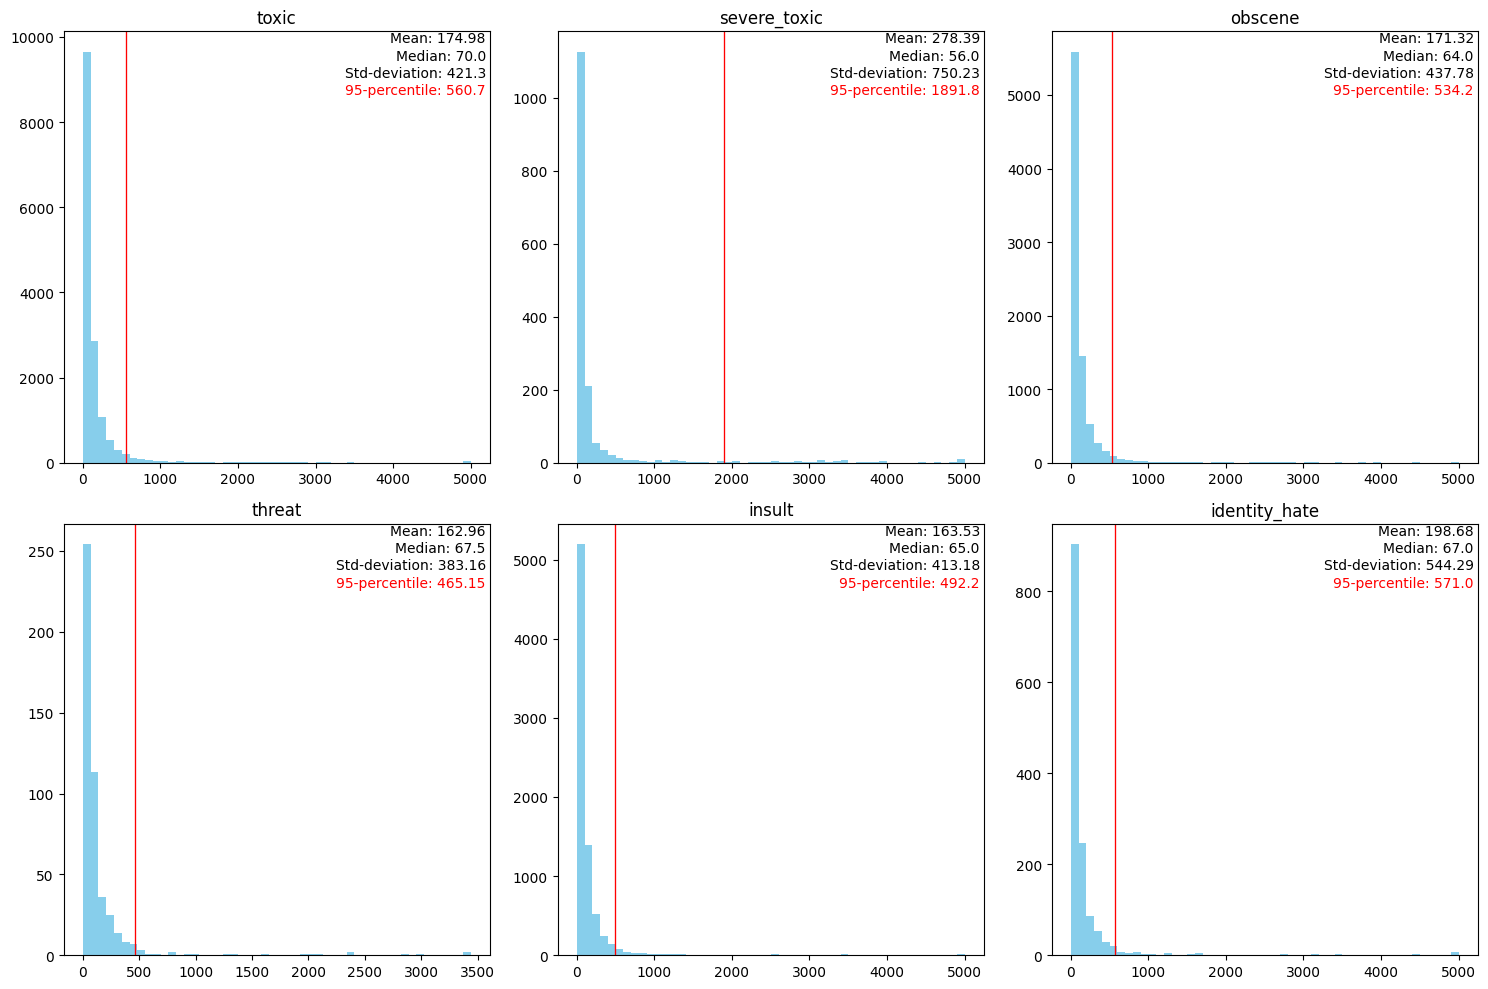

In [61]:
axes = []
fig, axes = plt.subplots(2, 3, figsize=(15,10))

len_sentences = np.array([len(str(sentence)) for sentence in preprocessed_text])

for i, col in enumerate(injurious.columns):
    len_sentences_col = len_sentences[df[df[col] == 1].index]
    ax = axes[i//3, i%3]
    ax.hist(len_sentences_col, bins=50, color='skyblue')
    ax.set_title(col)
    ax.text(.99, 1, f"Mean: {round(len_sentences_col.mean(), 2)}", transform=ax.transAxes, ha='right', va='top')
    ax.text(.99, .96, f"Median: {round(np.median(len_sentences_col), 2)}", transform=ax.transAxes, ha='right', va='top')
    ax.text(.99, .92, f"Std-deviation: {round(len_sentences_col.std(), 2)}", transform=ax.transAxes, ha='right', va='top')
    ax.text(.99, .88, f"95-percentile: {round(np.percentile(len_sentences_col, 95), 2)}", transform=ax.transAxes, ha='right', va='top', color='red')
    ax.axvline(x=np.percentile(len_sentences_col, 95), color='red', linewidth=.95)

fig.tight_layout()
plt.show();


In [62]:
injurious[0:10]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,1,1,1,0,1,0
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0


In [63]:
from sklearn.model_selection import train_test_split

def train_test_val_split(data, labels=None, test_size=0.2, val_size=0.1, random_state=42):
    if labels is None:
        data, labels = data
    corpus, X_test, train_labels, y_test = train_test_split(data, labels, test_size=test_size, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(corpus, train_labels, test_size=val_size/(1-test_size), random_state=random_state)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_val = np.array(y_val)

    return X_train.astype(str).tolist(), X_test.astype(str).tolist(), X_val.astype(str).tolist(), y_train, y_test, y_val

X_train, X_test, X_val, y_train, y_test, y_val = train_test_val_split(preprocessed_text, labels=injurious, test_size=0.3, val_size=0.3)


X_train[0:3]
y_train[0:3]

['writing biographies want create biography please first read blp follow guidance put front name way removed per guidelines read see wikipedia article wizard advises bit editing first',
 'asking already initiated another sock puppet investigation please wait verdict way proves hound orchestrated total attack wiki personality purpose eliminating wiki opinion latest dispute article albania alexikoua remove sourced consensual material cia world fact book official housing census united nations confirm already proven rows meat alexikoua addition noticed unethical act user alexikoua forward admin opinion comment removed talk page demonstrated purpose changing artificially established consensus denied alexikoua know yet wiki definition sure get trying say days block verdict account',
 'checked pome indeed right legend fate amrod telufinwë one burned ships amras pityafinwë ambarussa survived presumably still died third kinslaying follow pome strictly curufin fëanor fourth son caranthir fifth']

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [64]:
from tensorflow.keras.preprocessing.text import Tokenizer

type(X_train)

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)

tokenizer.word_counts


list

OrderedDict([('writing', 933),
             ('biographies', 331),
             ('want', 4648),
             ('create', 1096),
             ('biography', 296),
             ('please', 11964),
             ('first', 4370),
             ('read', 3263),
             ('blp', 282),
             ('follow', 639),
             ('guidance', 86),
             ('put', 2474),
             ('front', 283),
             ('name', 4426),
             ('way', 4442),
             ('removed', 2632),
             ('per', 977),
             ('guidelines', 1313),
             ('see', 8559),
             ('wikipedia', 17657),
             ('article', 22694),
             ('wizard', 139),
             ('advises', 9),
             ('bit', 1316),
             ('editing', 3873),
             ('asking', 486),
             ('already', 2164),
             ('initiated', 47),
             ('another', 2622),
             ('sock', 477),
             ('puppet', 169),
             ('investigation', 180),
             ('wai

In [65]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test  = tokenizer.texts_to_sequences(X_test)
X_val   = tokenizer.texts_to_sequences(X_val)

vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size: ", vocab_size)

Vocabulary size:  92361


In [66]:
X_train[0]

[364,
 27,
 304,
 6,
 33,
 59,
 555,
 95,
 31,
 30,
 83,
 340,
 261,
 59,
 9,
 3,
 1,
 260,
 44,
 33]

In [67]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = len(max(X_train, key=len))
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)

X_train[0:5]
X_train.shape
y_train.shape



array([[364,  27, 304, ...,   0,   0,   0],
       [713, 117,  84, ...,   0,   0,   0],
       [524,  62,   7, ...,   0,   0,   0],
       [  6,  75, 153, ...,   0,   0,   0],
       [389, 900, 325, ...,   0,   0,   0]], dtype=int32)

(63828, 1250)

(63828, 6)

In [68]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPool1D
from keras.backend import clear_session

def LSTM_simple_model(vocab_size, maxlen, dense_units=1, activation='softmax'):
    model = Sequential()
    model.add(Embedding(input_dim = vocab_size, output_dim=150, input_length=maxlen))
    model.add(Dropout(0.65)) #avoid overfitting
    model.add(LSTM(units=50, return_sequences=True))
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.35))
    model.add(Dense(dense_units, activation=activation))
    return model

class EarlyStopping(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if logs['val_accuracy'] > 0.97 and epoch + 1 > 5:
            self.model.stop_training = True
            print('\nStop training at epoch:', epoch+1)


In [69]:
clear_session()
early_stopping = EarlyStopping()

base_model_name="base_LSTM.plk"
import pickle
from tensorflow.keras.models import load_model
if base_model_name not in os.listdir(storage_folder):
    base_model = LSTM_simple_model(vocab_size, maxlen, dense_units=len(y_train[0]), activation='sigmoid')
    base_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
else:
    base_model = load_model("../models/LSTM_model.keras")
    trained_model = pickle.load(open(storage_folder+"/"+base_model_name, 'rb'))
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1250, 150)         13854150  
                                                                 
 dropout (Dropout)           (None, 1250, 150)         0         
                                                                 
 lstm (LSTM)                 (None, 1250, 50)          40200     
                                                                 
 global_max_pooling1d (Glob  (None, 50)                0         
 alMaxPooling1D)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 6)                 306       
                                                        

In [70]:
if base_model_name not in os.listdir(storage_folder):
    trained_model = base_model.fit(X_train, y_train,
                        epochs=10, batch_size=32,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping])
    pickle.dump(trained_model, open(storage_folder+"/"+base_model_name, 'wb'))
    base_model.save("../models/LSTM_model.keras")


Epoch 1/10
1995/1995 [==============================] - 965s 483ms/step - loss: 0.0974 - accuracy: 0.8324 - val_loss: 0.0695 - val_accuracy: 0.9938
Epoch 2/10
1995/1995 [==============================] - 953s 478ms/step - loss: 0.0711 - accuracy: 0.9692 - val_loss: 0.0666 - val_accuracy: 0.9938
Epoch 3/10
1995/1995 [==============================] - 954s 478ms/step - loss: 0.0683 - accuracy: 0.9850 - val_loss: 0.0665 - val_accuracy: 0.9938
Epoch 4/10
1995/1995 [==============================] - 957s 480ms/step - loss: 0.0667 - accuracy: 0.9888 - val_loss: 0.0657 - val_accuracy: 0.9937
Epoch 5/10
1995/1995 [==============================] - 955s 479ms/step - loss: 0.0650 - accuracy: 0.9887 - val_loss: 0.0658 - val_accuracy: 0.9925
Epoch 6/10
1995/1995 [==============================] - ETA: 0s - loss: 0.0641 - accuracy: 0.9900
Stop training at epoch: 6
1995/1995 [==============================] - 958s 480ms/step - loss: 0.0641 - accuracy: 0.9900 - val_loss: 0.0672 - val_accuracy: 0.9937

In [71]:
trained_model.history

{'loss': [0.09740230441093445,
  0.07106531411409378,
  0.06832749396562576,
  0.06667742133140564,
  0.06500918418169022,
  0.06405728310346603],
 'accuracy': [0.8324089646339417,
  0.96919846534729,
  0.9849752187728882,
  0.9888450503349304,
  0.98867267370224,
  0.9900043606758118],
 'val_loss': [0.06954783201217651,
  0.06659490615129471,
  0.06652738153934479,
  0.06571706384420395,
  0.06583882868289948,
  0.06716660410165787],
 'val_accuracy': [0.9938167333602905,
  0.9938167333602905,
  0.9938167333602905,
  0.9936704635620117,
  0.9925215840339661,
  0.9937122464179993]}

In [72]:
base_model.evaluate(X_test, y_test)

1496/1496 [==============================] - 136s 91ms/step - loss: 0.0675 - accuracy: 0.9939


[0.06746478378772736, 0.993879497051239]

In [73]:
y_pred = base_model.predict(X_test)


#y_pred[i for i in range(len(y_pred)) if y_pred[i] != y_test[i] ]

1496/1496 [==============================] - 135s 90ms/step


In [74]:
y_pred.T[0]

array([0.1319913 , 0.00079456, 0.3652848 , ..., 0.65346855, 0.01092749,
       0.00798131], dtype=float32)

In [75]:
for i in range(len(y_pred)):
    for j in range(len(y_pred[i])):
        y_pred[i][j] = 1 if y_pred[i][j] > 0.5 else 0

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def print_confusion_matrix(y_test, y_pred, columns):
    fig, axes = plt.subplots(2, 3, figsize=(18, 9))
    print(columns)
    for i, col in enumerate(columns):
        ax = axes[i//3, i%3]
        sns.heatmap(confusion_matrix(y_test.T[i], y_pred.T[i]), annot=True, fmt='d', cmap="Greens", ax=ax)
        ax.set_title(f"Confusion matrix for {col}")
        ax.set_xlabel("Predicted severity")
        ax.set_ylabel("Severity")
        ax.xaxis.set_ticklabels([f'Pred non {col}', f'Pred {col}'])
        ax.yaxis.set_ticklabels([f'Non {col}', f'{col}'])
    
    plt.subplots_adjust(hspace=0.3)
    plt.show()

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')


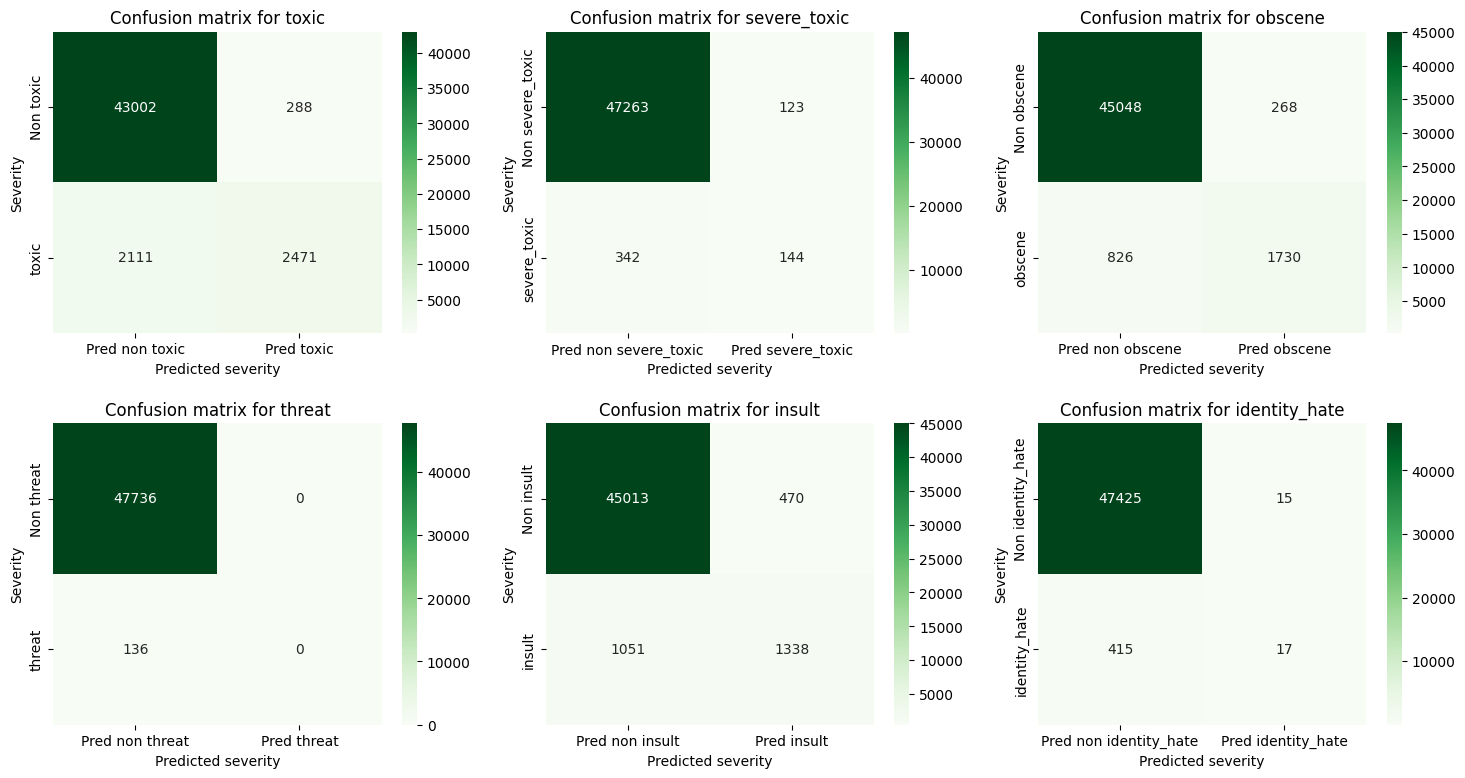

In [77]:
print_confusion_matrix(y_test, y_pred, injurious.columns)

## RNN with GRU layer

In [78]:
#RNN model with GRU layer and 4 hidden layers
from tensorflow.keras.layers import GRU, SimpleRNN, Dropout

clear_session()
rnn_gru_model = Sequential()
rnn_gru_model.add(Embedding(input_dim = vocab_size, output_dim=50, input_length=maxlen))
rnn_gru_model.add(GRU(units=64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
rnn_gru_model.add(SimpleRNN(units=64, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
rnn_gru_model.add(Dense(32, activation='relu'))
rnn_gru_model.add(Dropout(0.2))
rnn_gru_model.add(Dense(len(y_train[0]), activation='sigmoid'))


rnn_gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_gru_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1250, 50)          4618050   
                                                                 
 gru (GRU)                   (None, 1250, 64)          22272     
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                                 
Total params: 4650856 (17.74 MB)
Trainable params: 46508

In [79]:
history_rnn_gru = rnn_gru_model.fit(X_train, y_train,
                    epochs=5, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])


Epoch 1/5
1995/1995 [==============================] - 1945s 974ms/step - loss: 0.1715 - accuracy: 0.8257 - val_loss: 0.1534 - val_accuracy: 0.9938
Epoch 2/5
1995/1995 [==============================] - 1963s 984ms/step - loss: 0.1457 - accuracy: 0.9854 - val_loss: 0.1437 - val_accuracy: 0.9938
Epoch 3/5
1995/1995 [==============================] - 1966s 986ms/step - loss: 0.1445 - accuracy: 0.9944 - val_loss: 0.1417 - val_accuracy: 0.9938
Epoch 4/5
1995/1995 [==============================] - 1974s 989ms/step - loss: 0.1436 - accuracy: 0.9945 - val_loss: 0.1413 - val_accuracy: 0.9938
Epoch 5/5
1995/1995 [==============================] - 1961s 983ms/step - loss: 0.1432 - accuracy: 0.9945 - val_loss: 0.1416 - val_accuracy: 0.9938


In [80]:
rnn_gru_model.evaluate(X_test, y_test)

1496/1496 [==============================] - 310s 207ms/step - loss: 0.1426 - accuracy: 0.9940


[0.1425740122795105, 0.9940466284751892]

In [81]:
pickle.dump(history_rnn_gru, open(storage_folder+"/"+"history_rnn_gru.plk", 'wb'))
rnn_gru_model.save("../models/rnn_gru_model.keras")

## Model with LSTM and Convolutional layer

In [ ]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

clear_session()
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim = vocab_size, output_dim=50, input_length=maxlen))
cnn_model.add(LSTM(units=50, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(len(y_train[0]), activation='softmax'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()


In [ ]:
history_cnn = cnn_model.fit(X_train, y_train,
                    epochs=5, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])